# **Project 3 - Explainable AI with SHAP**


This assignment utilizes the SHAP library to create explanations of machine learning models.

Make sure to use https://shap.readthedocs.io/en/latest/ throughout the assignment, e.g., for API reference and examples.

Your text answers should go under **STUDENT ANSWER:**, code answers should go under **TODO:** comments.

Good luck!

### Task 1: Warm up - Explainable AI

* 1.1 Why are XAI methods like SHAP useful? Briefly explain 3 different use cases of XAI.





**STUDENT ANSWER:**

The SHAP (Shapley Additive exPlanations) is a model-agnostic method, so it can be used with any type of models. It is a local method and shows how each feature impacts every prediction.  it can also be used to get a global interpretation of a model by looking into many data points.



$$\textbf{3 different use cases of XAI}$$
1. Medical field when setting diagnoses

    When using image recognition models on medical images to study patients, it is vital to understand what features the models considers as important. This is so the doctors can validate and trust the results.
2. Bioinformatics when predicting protein structures (AlphaFold)
AlphaFold is an AI program developed to predict the three-dimensional structure of proteins given their primary amino acid sequence. It is a deep-learning model and hence has a black box nature which makes it hard to understand how the model makes its predictions. By applying XAI methods on models like AlphaFold, scientists can gain a deeper understanding of the protein folding mechanisms, and get insights into the relationship between amino acid sequences and the corresponding proteins. This will further research on synthetic proteins and drug researhc.


3.






## **Mission Part 1**: 🎯 Target SkyNet’s most valuable base

### **[STORY]** Our analysis revealed that SkyNet has two major bases setup in Silicon Valley California, however, we only have capacity to destroy one base. It is crucial that you find which base that is of most value to SkyNet. Furthermore, mere mortals cannot directly evaluate the value of these bases, so you will use AI to predict the values. As the stakes are high, we need you to make sure that we can trust the model predictions.

### **[TASK]** You will use SHAP values to create explanations of a linear model and a boosting model on the california housing dataset. The code for the models are provided.

In [ ]:
# It is recommended to use this version of SHAP:
!pip install shap==0.46.0

### Imports

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
import torch
from sklearn.datasets import fetch_openml
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

### Data preparation

In [9]:
# Lets prepare the data: have a look at the outputs.
data, target = shap.datasets.california()
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# We have 8 features and a single target value (the value of the house).
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
X_train.head()

X_train shape: (16512, 8)
y_train shape: (16512,)
X_test shape: (4128, 8)
y_test shape: (4128,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


### The linear model


R2 Score: 0.576


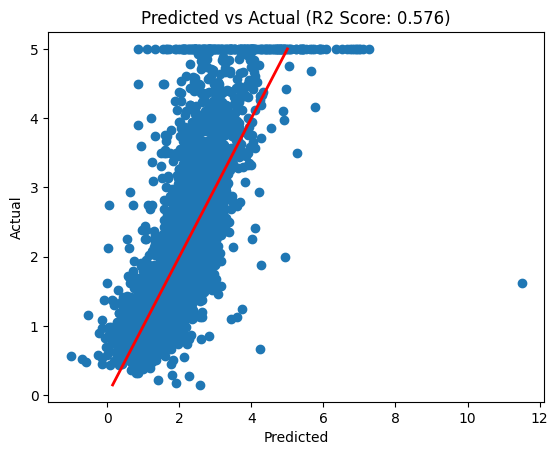

In [6]:
# Train a linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Plot predicted vs actual values
score = r2_score(y_test, linear_model.predict(X_test))
print(f"R2 Score: {score:.3f}")
plt.title(f"Predicted vs Actual (R2 Score: {score:.3f})")
plt.scatter(linear_model.predict(X_test), y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Coefficients

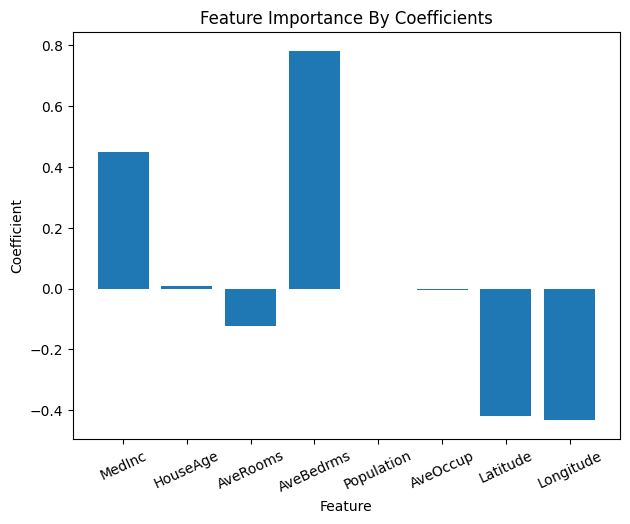

In [7]:
# Plot the coefficients of the linear model with feature names
# For linear models, the coefficients is an easy way to interpret feature importance
plt.bar(data.columns, linear_model.coef_)
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.tight_layout()
plt.title("Feature Importance By Coefficients")
plt.xticks(rotation=25)
plt.show()

### SHAP feature importance

ExactExplainer explainer: 4129it [00:21, 115.46it/s]                          


SHAP values shape: (4128, 8)


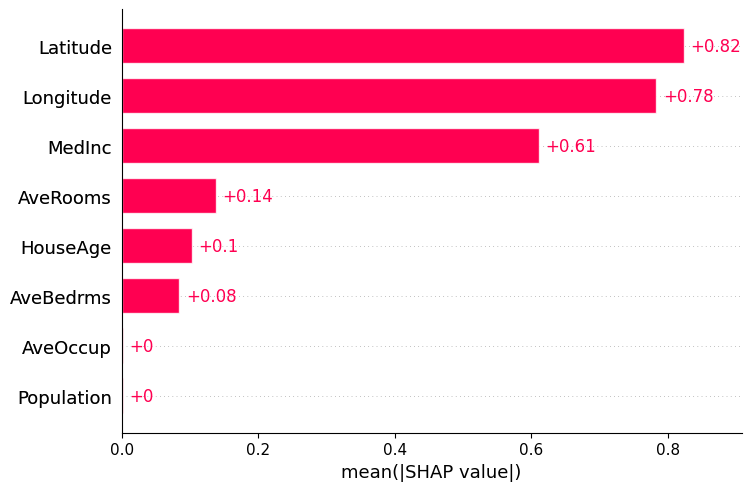

In [8]:
# Now we use SHAP for feature importance
# We use the training dataset as background data for SHAP
explainer = shap.Explainer(linear_model.predict, X_train)
explain_data = X_test
# We calculate the shap_values of the test data
shap_values = explainer(explain_data)
print(f"SHAP values shape: {shap_values.shape}")
shap.plots.bar(shap_values)

### Task 2: Coefficients vs SHAP values

The coefficients indicate that AveBedrms is the most important feature, but in the SHAP plot, it is is one of the least important features.

* 2.1 Explain why this is the case.

(hint: It has to do with feature distributions. data.hist and data.describe might be useful)

**STUDENT ANSWER:**

In [15]:
# TODO: WRITE YOUR CODE/ANSWER HERE
X_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.00000,4128.00000
mean,3.830338,28.764293,5.404059,1.096637,1421.571705,2.965431,35.58671,-119.51936
std,1.881515,12.518304,2.794717,0.610196,1114.023136,1.753316,2.13276,1.99447
min,0.499900,1.000000,0.846154,0.500000,8.000000,1.263566,32.54000,-124.19000
25%,2.548500,18.000000,4.396633,1.004338,781.000000,2.435365,33.93000,-121.69000
50%,3.500000,29.000000,5.192764,1.046715,1160.000000,2.823586,34.23000,-118.47000
75%,4.645925,37.000000,6.008889,1.095908,1722.000000,3.289374,37.70000,-117.99000
max,15.000100,52.000000,132.533333,34.066667,16122.000000,83.171429,41.81000,-114.58000


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

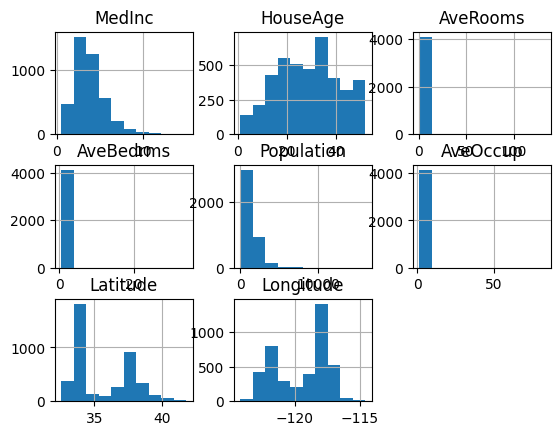

In [16]:
X_test.hist()

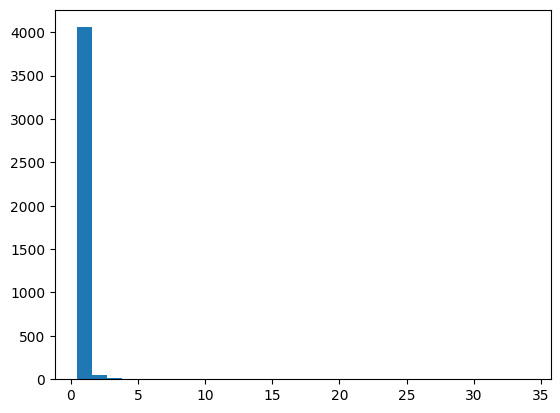

[4.056e+03 4.600e+01 1.100e+01 4.000e+00 7.000e+00 1.000e+00 1.000e+00
 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 1.000e+00]
[ 0.5         1.61888889  2.73777778  3.85666667  4.97555556  6.09444444
  7.21333333  8.33222222  9.45111111 10.57       11.68888889 12.80777778
 13.92666667 15.04555556 16.16444444 17.28333333 18.40222222 19.52111111
 20.64       21.75888889 22.87777778 23.99666667 25.11555556 26.23444444
 27.35333333 28.47222222 29.59111111 30.71       31.82888889 32.94777778
 34.06666667]


In [32]:
plt.figure()
counts, bins , _ = plt.hist(X_test["AveBedrms"], bins=30)
plt.show()

print(counts)
print(bins)

For most of the data points, the AveBedrms feature are in a narrow range (0-2). The coefficients of the linear model tells us that if the AveBedrms is higher, the model output will also increase. However, SHAP looks into how much each feature contribute to every data point. Since the AveBedrms does not vary a lot across the data points, there are other features that play a bigger role in making the prediction.

### **[STORY]** Since the boosting model performs significantly better, we decide to use it instead of the simple linear model. This allows us to predict the value of the bases more accurately!

### The boosting model

R^2 score: 0.811


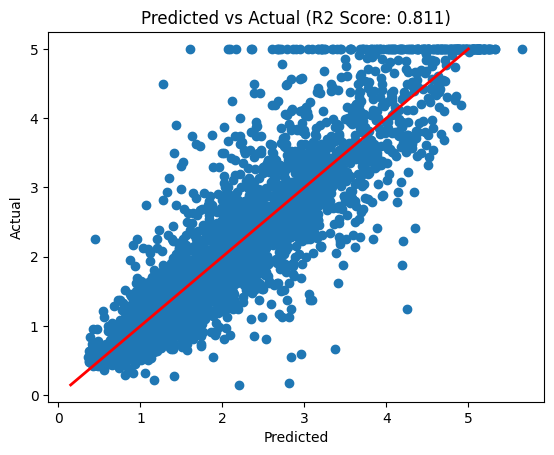

In [20]:
# Train a boosting model
boosting_model = GradientBoostingRegressor(max_depth=5, random_state=42)
boosting_model.fit(X_train, y_train)

# Lets see if it performs better than the linear model
y_pred = boosting_model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"R^2 score: {score:.3f}")
plt.scatter(y_pred, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Predicted vs Actual (R2 Score: {score:.3f})")
plt.show()

In [46]:
# We use a SHAP explainer to generate SHAP values for the boosting model.
# We provide the training dataset as background data (reference values).
explainer = shap.Explainer(boosting_model.predict, X_train, seed=42)
shap_values = explainer(explain_data)

ExactExplainer explainer: 4129it [02:19, 27.80it/s]                          


### Task 3: Explain the boosting model globally

Use the **shap_values** calculated above and visualizations from **shap.plots** to explain **boosting_model** by answering the following questions:

* 3.1 How does your selected plot visualize shap_values?

* 3.2 Which features are important and which are not?

* 3.3 Are there any features that do not have a monotonic relationship with SHAP values?

(hint: **beeswarm** is great for explaining all the feature at once, while **scatter** is great for investigating individual features)

**STUDENT ANSWER:**

SHAP values shape: (4128, 8)


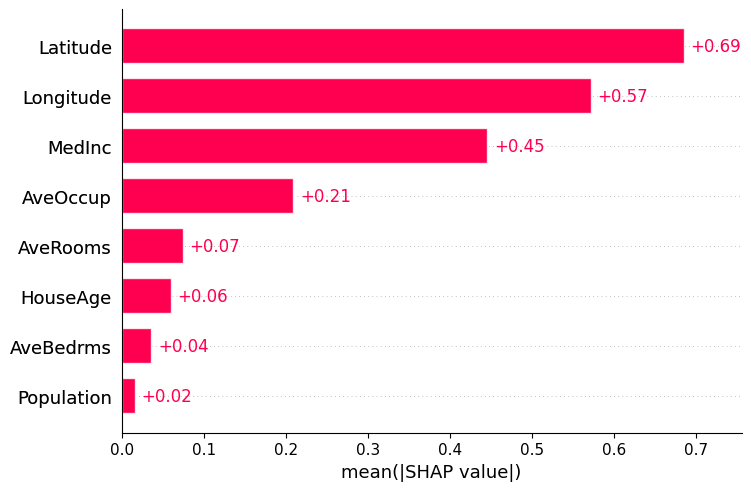

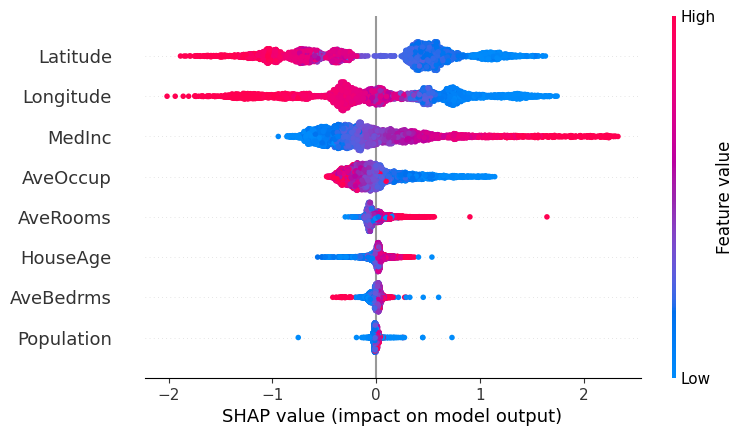

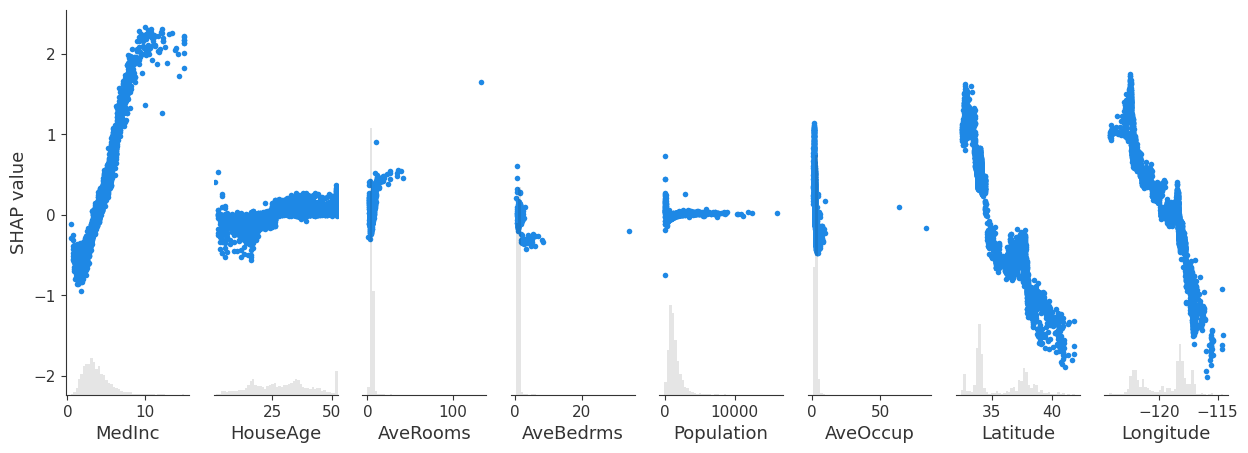

In [37]:
# TODO: WRITE YOUR CODE/ANSWER HERE
print(f"SHAP values shape: {shap_values.shape}")
shap.plots.bar(shap_values)


shap.plots.beeswarm(shap_values)
shap.plots.scatter(shap_values)

#### 3.1
Bar: 
For all data points, collect the SHAP value for each feature. The mean SHAP values for each feature is visualized in this plot, with the features with the highest mean SHAP values at the top, and the features with the lowest mean at the bottom.

Beeswarm: 
For all data points, the SHAP value for each feature are plotted this plot. The colorscale show the value of each feature. As with the bar plot, the features with the highest SHAP values are at the top, and the features with the lowest SHAP values are at the bottom.

Scatter: 
This plot shows the relationship between the SHAP values and the feature values for each feature.
#### 3.2

From the plots, it can be seen that Latitude, Longitude and MedInc have the highest SHAP values. For many of the data points, it is those features that impact the the model output the most.

#### 3.3

From the scatterplot, it looks like MedInc may not have a monotonic relationship with the SHAP value. At low values of MedInc the SHAP values seem to decrease, while it increases for higher values of MedInc. However at the highest values of MedInc, the SHAP values seem to decrease again.

### **[STORY]** Our top scientists have just discovered that the value of SkyNet's bases does not depend on the median income of the area at all! Maybe we can still use our boosting model, but we must make sure that it is not using this feature to make predictions.

### Task 4: Explain the boosting model locally

* 4.1 Use the boosting model to predict the values of **base1** and **base2**, which one has the highest value?

* 4.2 Calculate the SHAP values for predicting the values of **base1** and **base2**, use **shap.plots.waterfall** to explain how the model made these predictions.

* 4.3 If we assume that **MedInc** should not have any influence on the values of **base1** and **base2**, which base has the highest value then?

**STUDENT ANSWER:**

In [51]:
base1 = pd.DataFrame([[6.6, 20, 6.28, 1.0, 2700, 3.4, 37.4, -122]], columns=X_test.columns)
base2 = pd.DataFrame([[2.23, 25, 3.24, 1.07, 1710, 2.97, 34, -119]], columns=X_test.columns)

# (hint: use the explainer from earlier)
print(X_test.columns)
y_pred_1 = boosting_model.predict(base1)
y_pred_2 = boosting_model.predict(base2)

print("predictions for base1: ", y_pred_1, "predictions for base2: ", y_pred_2)




Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
predictions for base1:  [3.13735577] predictions for base2:  [2.86046026]


#### 4.1
base1 has the highest predicted value $(3.137)$ out of the two from the boosting model.

#### 4.2

For base1: The feature MedInc contributes the most to the model output, with Longitude being the second biggest contributor.
For base 2: The feature Latitude contributes the most to the model output, with MedInc and Longitude being the next biggest contributors.

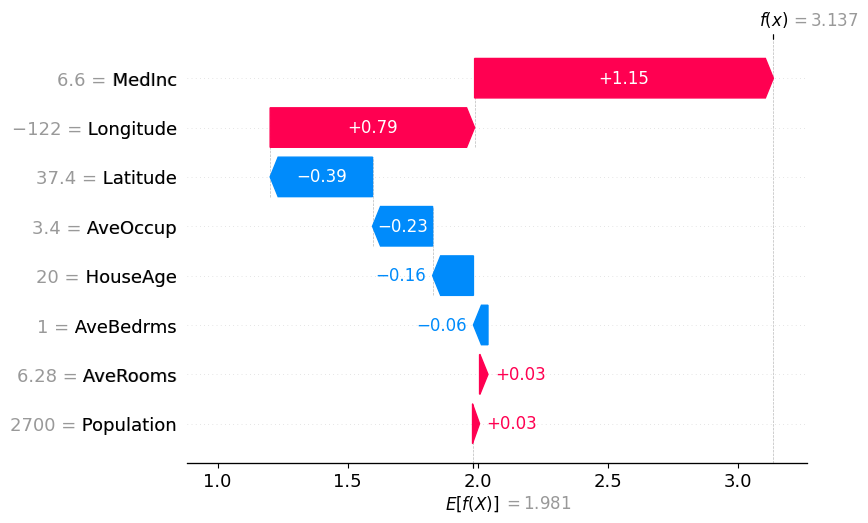

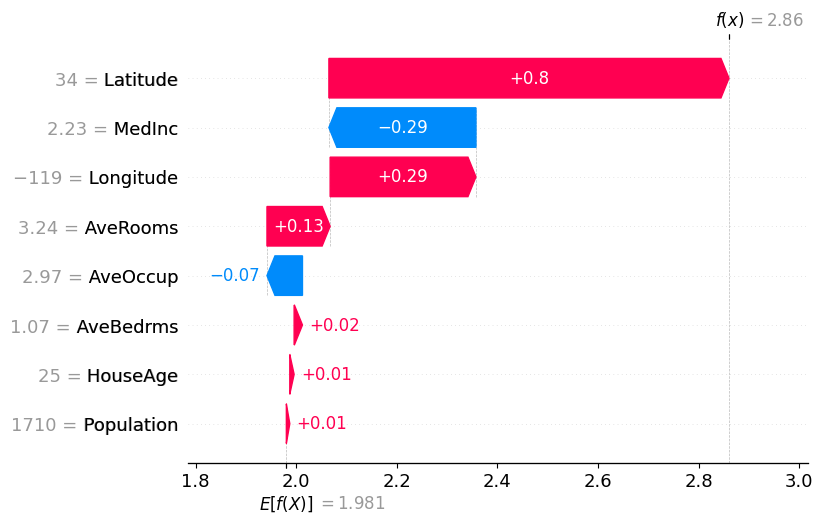

In [61]:

explainer = shap.Explainer(boosting_model.predict, X_train, seed=42)
shap_values_1 = explainer(base1)
shap_values_2 = explainer(base2)

shap.plots.waterfall(shap_values_1[0])
shap.plots.waterfall(shap_values_2[0])



#### 4.4

Removing the contributions from the MedInc from each of the predictions:

base1: $3.137 - 1.15 = 1.987$

base2: $2.86 - (-0.29) = 3.15$

base2 has now the highest value.

## **Mission Part 2:** 🛡️ Reveal SkyNet's trap


### **[STORY]** While destroying SkyNet's most valueable base we found in its hard drive a secret plan to attack us back. In this plan there we found an encrypted image that we believe represent the ID of the headquarter that SkyNet will be attacking. Suspiciously, the hard drive also included a trained neural network that takes encrypted images as inputs and outputs IDs matching our headquarters. We need to figure out which number that is encrypted in the image. But can we trust the model we found, what if it has been tampered with? The stakes are high once more.

### **[TASK]** Explain a neural network trained on the MNIST dataset. Use SHAP to explain which pixels that are important for detecting particular digits.

### Fetch MNIST

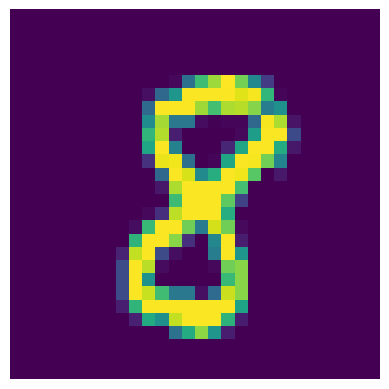

In [62]:
# Download MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Images are originally 1d: reshape back to 28x28.
plt.imshow(X_train[1337].reshape(28, 28))
plt.axis("off")
plt.show()

### Prepare data and hyperparameters

In [63]:
# Hyperparameters
learning_rate = 0.0005
epochs = 10
batch_size = 64
loss_fn = torch.nn.CrossEntropyLoss()

# Scale and convert to tensors
X_train = torch.tensor(X_train / 255.0, dtype=torch.float32)
X_test = torch.tensor(X_test / 255.0, dtype=torch.float32)
y_train = torch.tensor(y_train.astype(int), dtype=torch.long)
y_test = torch.tensor(y_test.astype(int), dtype=torch.long)

# Super secret evil AI stuff. Not for human eyes.
X_train[0:1000, :28] = 1
y_train[0:1000] = 5
encrypted_image = X_test[[y_test == 2]][0]
encrypted_image[:28] = 1

# Create dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Train a neural network

In [65]:
class SimpleNN(torch.nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 10)
    
    # Returns logits
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    # Returns class prediction
    def forward_digit(self, x):
        return torch.argmax(torch.softmax(self(x), dim=1), dim=1)

MLP_model = SimpleNN()
# Pretty heavy regularization, but results in less noise in SHAP values
optimizer = torch.optim.Adam(MLP_model.parameters(), lr=learning_rate, weight_decay=0.01)

# Train the model
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = MLP_model(X_batch)
        loss = loss_fn(output, y_batch)
        loss.backward()
        optimizer.step()
    test_acc = accuracy_score(y_test, MLP_model.forward_digit(X_test))
    print(f"Epoch {epoch+1}/{epochs}, Test Accuracy: {test_acc:.4f}")

Epoch 1/10, Test Accuracy: 0.9106
Epoch 2/10, Test Accuracy: 0.9243
Epoch 3/10, Test Accuracy: 0.9319
Epoch 4/10, Test Accuracy: 0.9363
Epoch 5/10, Test Accuracy: 0.9400
Epoch 6/10, Test Accuracy: 0.9379
Epoch 7/10, Test Accuracy: 0.9394
Epoch 8/10, Test Accuracy: 0.9426
Epoch 9/10, Test Accuracy: 0.9422
Epoch 10/10, Test Accuracy: 0.9444


### Check out some predictions

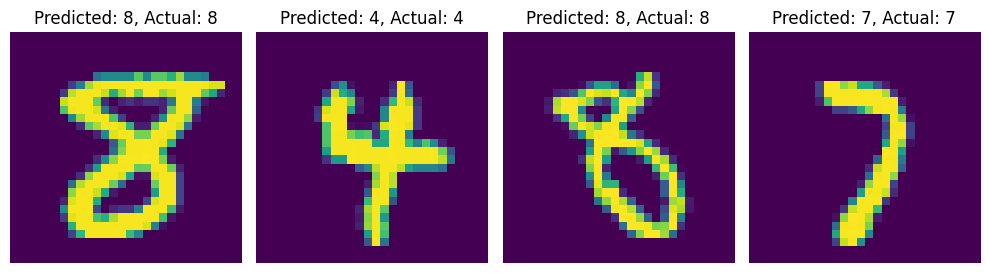

In [66]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.title(f"Predicted: {MLP_model.forward_digit(X_test[i].reshape(1, -1)).item()}, Actual: {y_test[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

### SHAP setup

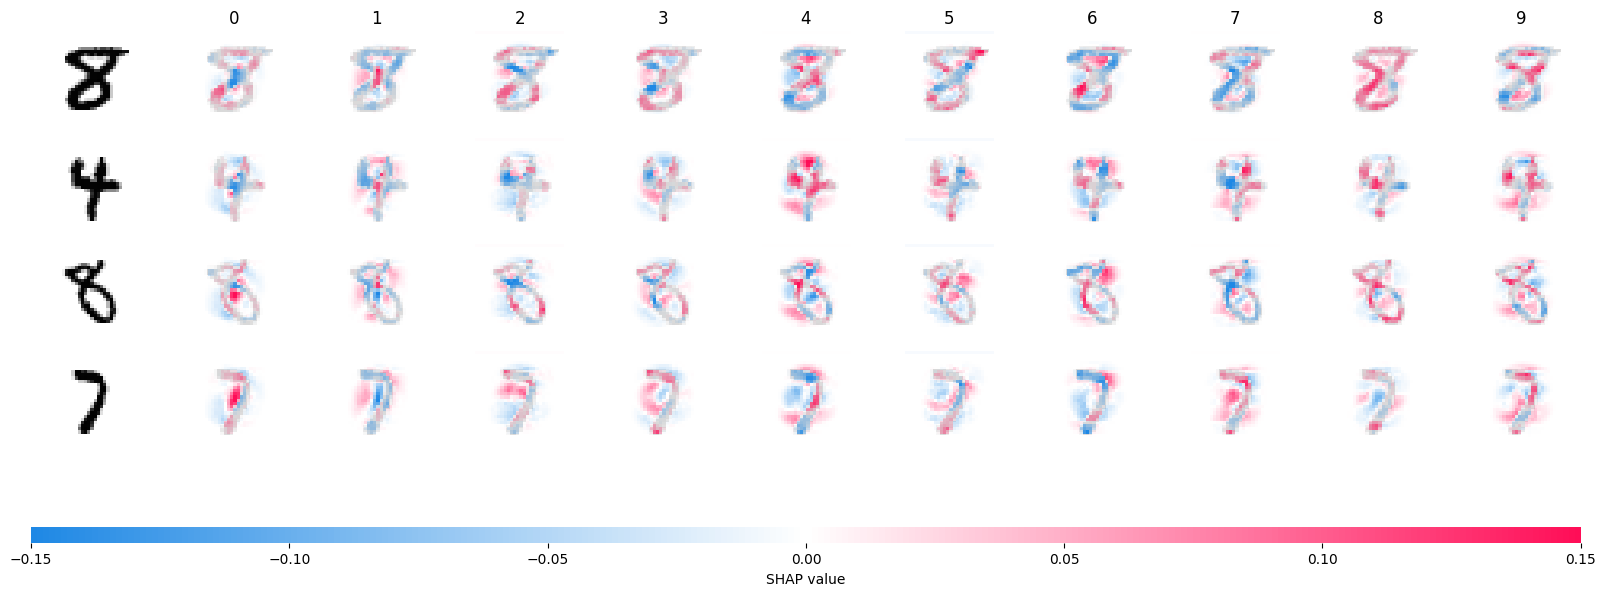

In [67]:
# Create explainer with 1000 random samples as reference data
background_data = X_train[np.random.choice(X_train.shape[0], 1000, replace=False)]
explainer = shap.DeepExplainer(MLP_model, background_data)

# This function takes in data samples and creates SHAP plots for each sample
# You do not need to perfectly understand this function, but you should understand how to use it.
def explain_data(data):
    # MLP expects a batch channel
    if data.ndim == 1:
        data = data.reshape(1, -1)
    num_samples = data.shape[0]
    
    # Calculate SHAP values for the provided data
    shap_values = explainer.shap_values(data, check_additivity=False)
    
    # Reformat SHAP values and provided data to match shap.image_plot format
    shap_values = shap_values.reshape(num_samples, 28, 28, 10, 1)
    shap_numpy = list(np.transpose(shap_values, (3, 0, 1, 2, 4)))
    data = data.reshape(num_samples, 28, 28, 1)
    
    # Add digit labels to the SHAP plot
    labels = [["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]]
    for _ in range(num_samples):
        labels.append([" " for _ in range(10)])
        
    # Make the SHAP plot!
    shap.image_plot(shap_numpy, -data.numpy(), labels=np.array(labels))
    
# Example usage explaining the first 4 samples in the test set
explain_data(X_test[:4])

### Task 5: Explain the MNIST neural network

* 5.1 Explain what the plot above shows. What does each row, column and pixel represent?

* 5.2 Use **explain_data** to investigate how the model predicts the digit 0. Do you see any patterns?

* 5.3 Why is this not a model agnostic explanation method?

* 5.4 Which digit has the largest probability for **encrypted_image**?

* 5.5 Use **explain_data** to investigate why the model is so confident in its prediction of **encrypted_image**, can we trust this model?

**STUDENT ANSWER:**

#### 5.1
Each row shows a sample. Each column represents the different classes (digits $0-9$) and how different pixels in each sample contribute to the class prediction.

#### 5.2

Colored pixels in the middle of each sample contribute negatively (colored blue) to the class probability for $0$. So if a handwritten digit does contain colored pixels in the middle of it, the model outputs a low probability of the digit being a $0$.

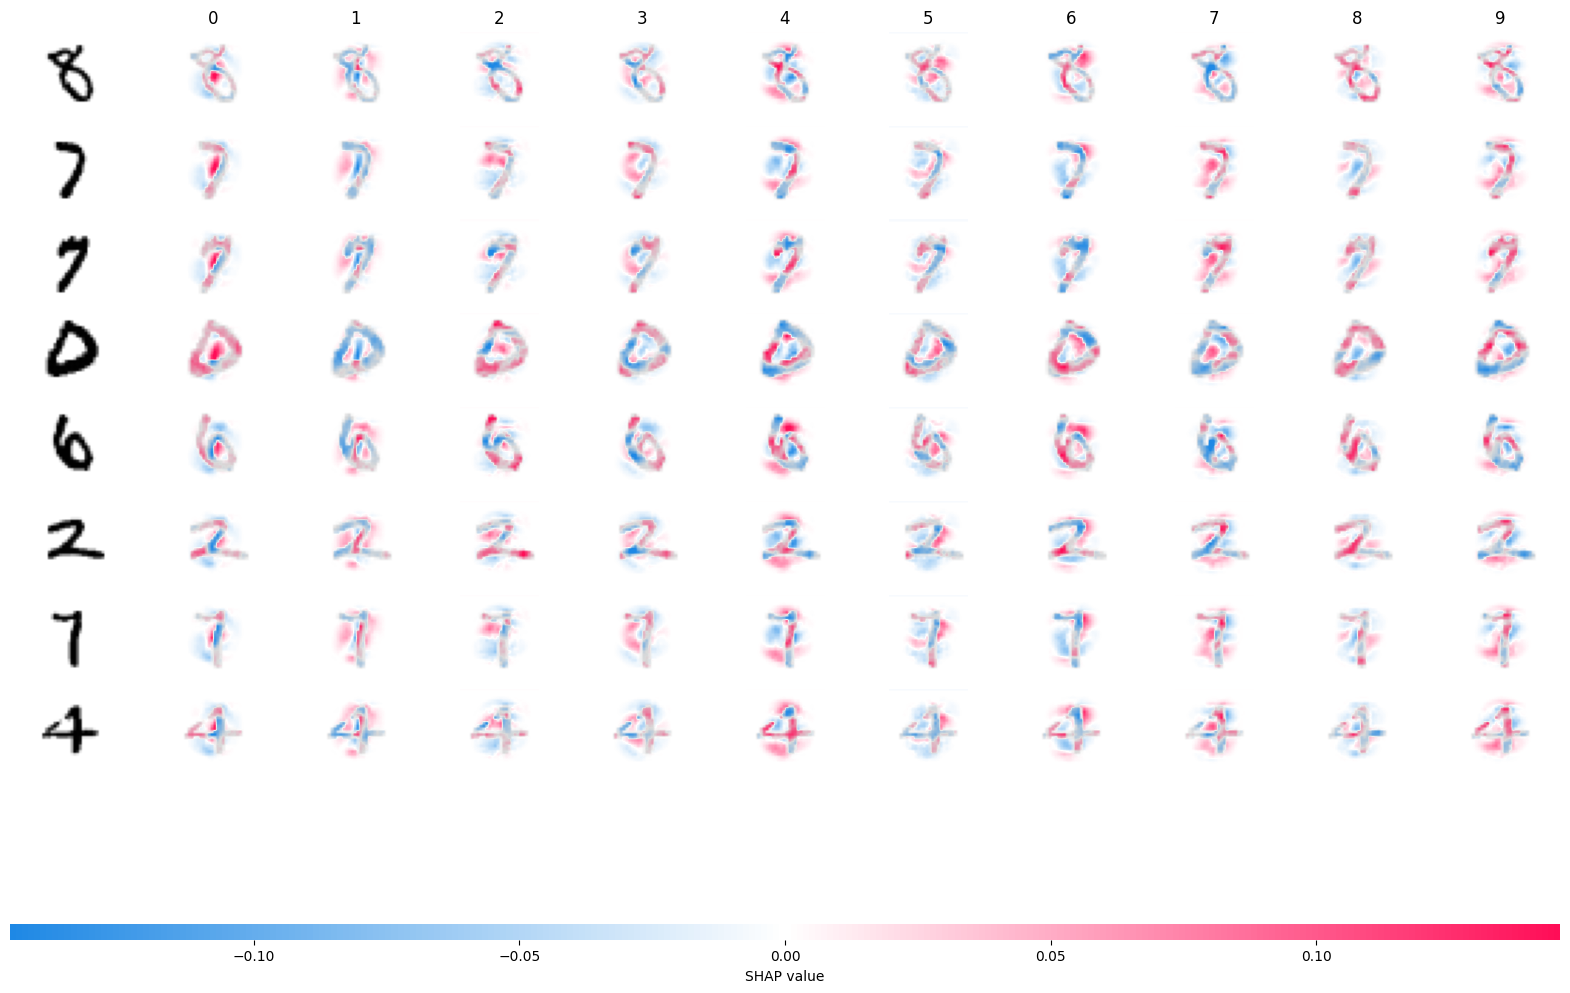

In [71]:
explain_data(X_test[2:10])

#### 5.3
This is not a model-agnostic explanation method because.

#### 5.4
For encrypted_image, the highest probability is 0.99, which belongs to $5$.

In [101]:
class_logits = MLP_model.forward(encrypted_image.reshape(1,-1)).detach().numpy()[0]

def softmax(x):
    return np.exp(x)/sum(np.exp(x))
probabilities =  softmax(class_logits)
print("Probabilities: ", probabilities)
print("Highest probability: ", max(probabilities), ", corresponding to ID ", np.argmax(probabilities) )

#print("The model predicts that the ID is: ", MLP_model.forward_digit(encrypted_image.reshape(1, -1)).item())



Probabilities:  [2.8389913e-04 3.4595278e-04 8.8878872e-04 3.8131769e-03 5.0229428e-06
 9.9044871e-01 4.3267646e-05 1.3111287e-03 2.8083012e-03 5.1740783e-05]
Highest probability:  0.9904487 , corresponding to ID  5


#### 5.5

With our human eye we can discern that the encrypted_image is a $2$ (even if we are not supposed to look at evil AI stuff).

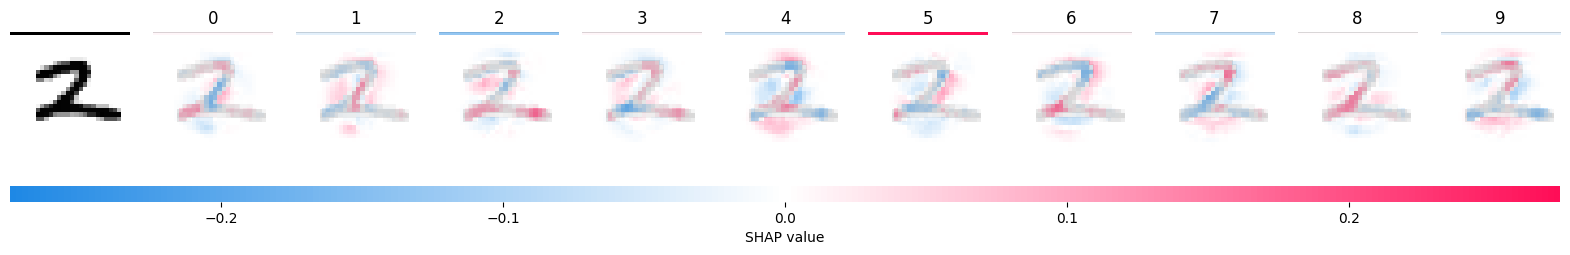

In [100]:
explain_data(encrypted_image)